In [115]:
library(tidyverse)
library(tidymodels)
library(GGally)

In [116]:
players_url <- "https://raw.githubusercontent.com/NelsonJYLee/dsci100-project/refs/heads/main/data/players.csv"
sessions_url <- "https://raw.githubusercontent.com/NelsonJYLee/dsci100-project/refs/heads/main/data/sessions.csv"

In [117]:
players <- read_csv(players_url)
nrow(players)
ncol(players)

played_hours_summary <- players |>
    summarize(
        min_hours = min(played_hours, na.rm = TRUE),
        max_hours = max(played_hours, na.rm = TRUE),
        mean_hours = mean(played_hours, na.rm = TRUE),
        median_hours = median(played_hours, na.rm = TRUE),
        sd_hours = sd(played_hours, na.rm = TRUE)
      )

age_summary <- players |>
  summarize(
    min_age = min(Age, na.rm = TRUE),
    max_age = max(Age, na.rm = TRUE),
    mean_age = mean(Age, na.rm = TRUE),
    median_age = median(Age, na.rm = TRUE),
    sd_age = sd(Age, na.rm = TRUE)
  )

experience_summary <- players |>
    group_by(experience) |>
    summarize(count = n()) |>
    mutate(percent = count/sum(count) * 100)

subscribe_summary <- players |>
    group_by(subscribe) |>
    summarize(count = n()) |>
    mutate(percent = count/sum(count) * 100)

gender_summary <- players |>
    group_by(gender) |>
    summarize(count = n()) |>
    mutate(percent = count/sum(count) * 100) 

played_hours_summary
age_summary
experience_summary
subscribe_summary
gender_summary

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 196

[1] 7

min_hours,max_hours,mean_hours,median_hours,sd_hours
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,223.1,5.845918,0.1,28.35734


min_age,max_age,mean_age,median_age,sd_age
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
9,58,21.13918,19,7.389687


experience,count,percent
<chr>,<int>,<dbl>
Amateur,63,32.142857
Beginner,35,17.857143
Pro,14,7.142857
Regular,36,18.367347
Veteran,48,24.489796


subscribe,count,percent
<lgl>,<int>,<dbl>
FALSE,52,26.53061
TRUE,144,73.46939


gender,count,percent
<chr>,<int>,<dbl>
Agender,2,1.0204082
Female,37,18.8775510
Male,124,63.2653061
Non-binary,15,7.6530612
Other,1,0.5102041
Prefer not to say,11,5.6122449
Two-Spirited,6,3.0612245


In [118]:
sessions <- read_csv(sessions_url)
nrow(sessions)
ncol(sessions)

sessions_hashedEmail_summary <- sessions |>
    group_by(hashedEmail) |>
    summarize(count = n())

sessions_num_summary <- sessions_hashedEmail_summary |>
    summarize(
        min_sessions = min(count, na.rm = TRUE),
        max_sessions = max(count, na.rm = TRUE),
        mean_sessions = mean(count, na.rm = TRUE),
        median_sessions = median(count, na.rm = TRUE),
        sd_sessions = sd(count, na.rm = TRUE))

original_start_time_summary <- sessions |>
    summarize(
        min_start = min(original_start_time, na.rm = TRUE),
        max_start = max(original_start_time, na.rm = TRUE),
        mean_start = mean(original_start_time, na.rm = TRUE),
        median_start = median(original_start_time, na.rm = TRUE),
        sd_start = sd(original_start_time, na.rm = TRUE))

original_end_time_summary <- sessions |>
    summarize(
        min_end = min(original_end_time, na.rm = TRUE),
        max_end = max(original_end_time, na.rm = TRUE),
        mean_end = mean(original_end_time, na.rm = TRUE),
        median_end = median(original_end_time, na.rm = TRUE),
        sd_end = sd(original_end_time, na.rm = TRUE))

hashedEmail_summary
original_start_time_summary
original_end_time_summary

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 1535

[1] 5

min_sessions,max_sessions,mean_sessions,median_sessions,sd_sessions
<int>,<int>,<dbl>,<int>,<dbl>
1,310,12.28,1,41.3269


min_start,max_start,mean_start,median_start,sd_start
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.7124e+12,1.72733e+12,1.719201e+12,1.7192e+12,3557491589


min_end,max_end,mean_end,median_end,sd_end
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.7124e+12,1.72734e+12,1.719196e+12,1.71918e+12,3552813134


# Data Description

## Players file
- consists of 196 observations and 7 variables
- variables: experience, subscribe,	hashedEmail, played_hours, name, gender, Age
- name and hashedEmail are are mostly unique categorical varibles and not useful to summarize

### Quantitative Variables Summary
| Variable    | Description               | Mean     | SD     | Min    | Max     | Median  |
|-------------|---------------------------|----------|--------|--------|---------|---------|
| played_hours| number of hours played    | 5.85     | 28.36  | 0.00   | 223.10  | 0.10    |
| Age         | age of the player         | 21.14    | 7.39   | 9.00   | 58.00   | 19.00   |

### Categorical Variables Summary
#### Summary of experience
Description of variable: self-claimed experience with Minecraft
| Experience | Count | Percent |
|------------|-------|---------|
| Amateur    | 63    | 32.14   |
| Beginner   | 35    | 17.86   |
| Pro        | 14    | 7.14    |
| Regular    | 36    | 18.37   |
| Veteran    | 48    | 24.49   |

#### Summary of subscribe
Description of variable: subscribe is true if they are subscribed to a game-related newsletter and false if not
| Subscribe  | Count | Percent |
|------------|-------|---------|
| TRUE       | 144   | 73.47   |
| FALSE      | 52    | 26.53   |

#### Summary of gender
Description of variable: self-claimed gender
| Gender            | Count | Percent |
|-------------------|-------|---------|
| Agender           | 2     | 1.02    |
| Female            | 37    | 18.88   |
| Male              | 124   | 63.27   |
| Non-binary        | 15    | 7.65    |
| Other             | 1     | 0.51    |
| Prefer not to say | 11    | 5.61    |
| Two-Spirited      | 6     | 3.06    |

### Potential Problems with Players file
- Age column has 2 missing values, so we must ignore then when getting Age's statistics
- Age is reported in whole years but has the double type. Should be of type int.

## Sessions file
- consists of 1535 observations and 5 variables
- variables: hashedEmail, start_time, end_time, original_start_time, original_end_time
- start_time and end_time are not useful to summarize, explained below
- original_start_time and original_end_time are not useful to summarize, explained below

### Quantitative Variables Summary
| Variable         | Description                                                | Mean     | SD     | Min    | Max     | Median  |
|------------------|------------------------------------------------------------|----------|--------|--------|---------|---------|
| hashedEmailCount | count of sessions of each unique encrypted email address   | 12.28    | 41.33  | 1.00   | 310.00  | 1.00    |

### Potential Problems with Sessions file
- original_start_time and original_end_time columns are both missing 2 values
- original_start_time and original_end_time are mostly the same value in all observations. The ending decimal places seem to have been rounded off. This means if we try to calculate the sesison duration from original_end_time - original_start_time, we will get a duration of 0 for almost every obsevation (besides a couple)
- start_time and end_time are strings which are unique to the minute, meaning that we cannot immediatley use them to calculate session durations or filter for time periods. We must first convert the strings
- most email addresses are associated with only one playing session, meaning it would be hard to draw conclusions about player behaviour over time


# Question of Interest

- broad: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?
- specific: Can the age and Minecraft hours played predict if a player is subscribed to a game-related newsletter?
- The data in players.csv and sessions.csv will help me answer this question by providing me the direct variables needed

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


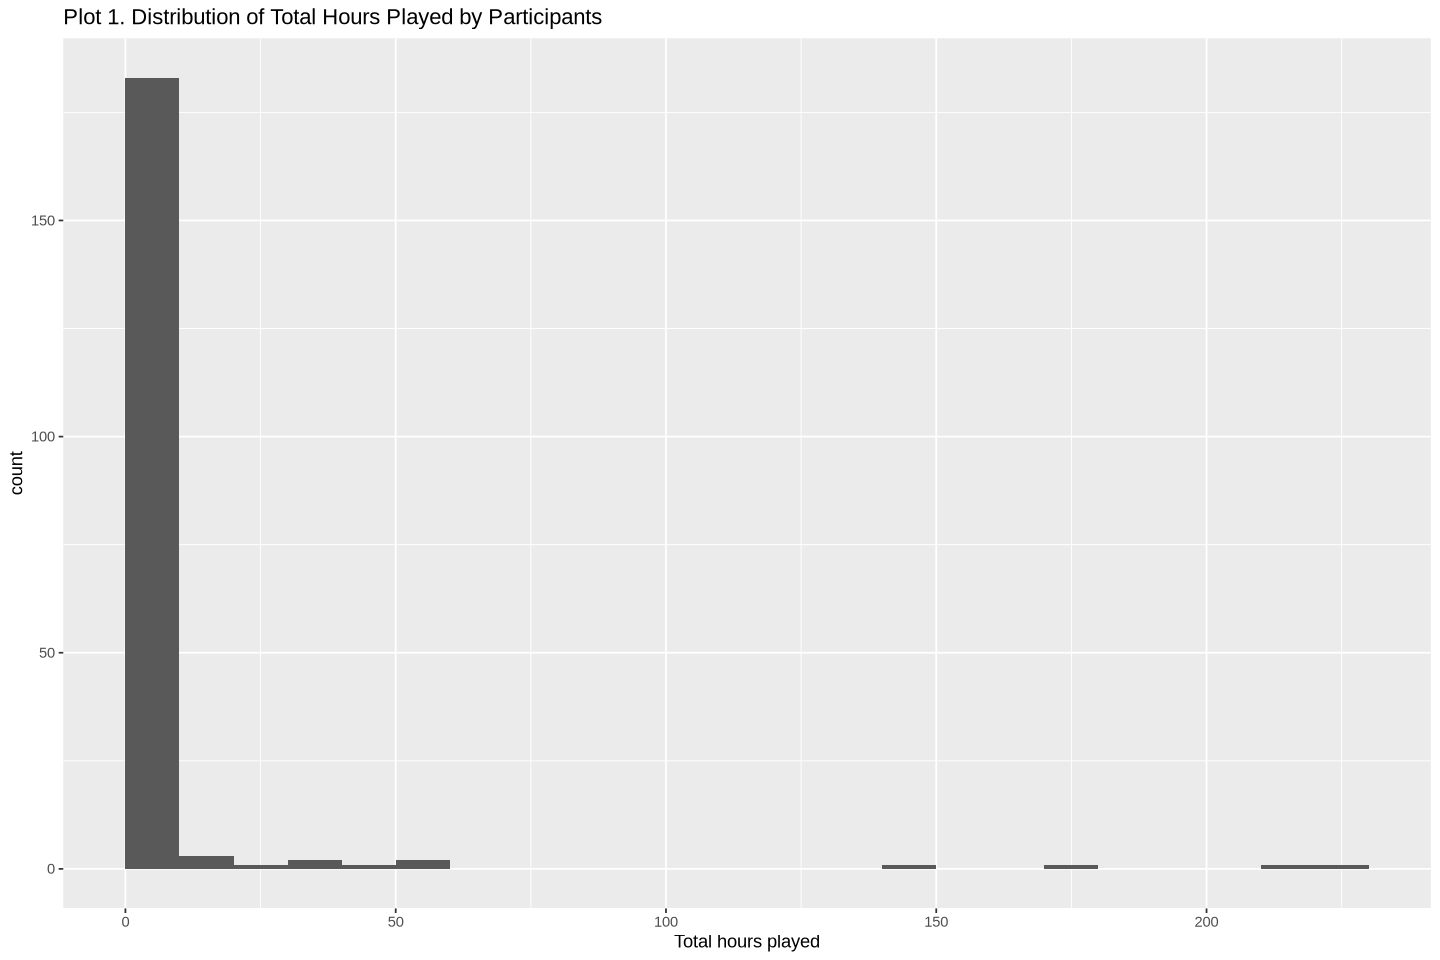

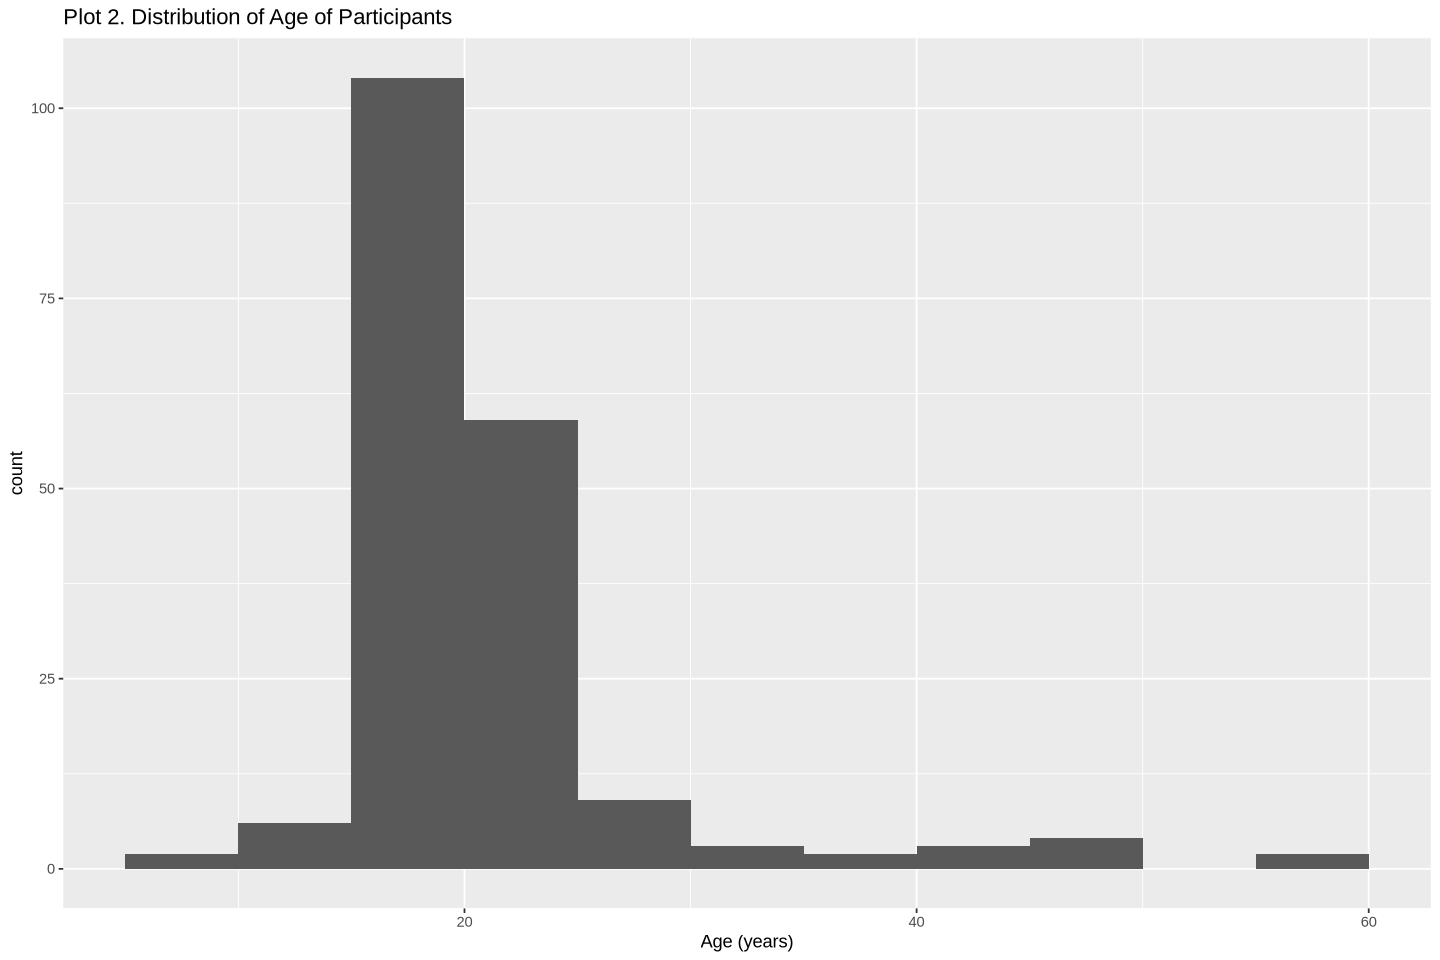

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


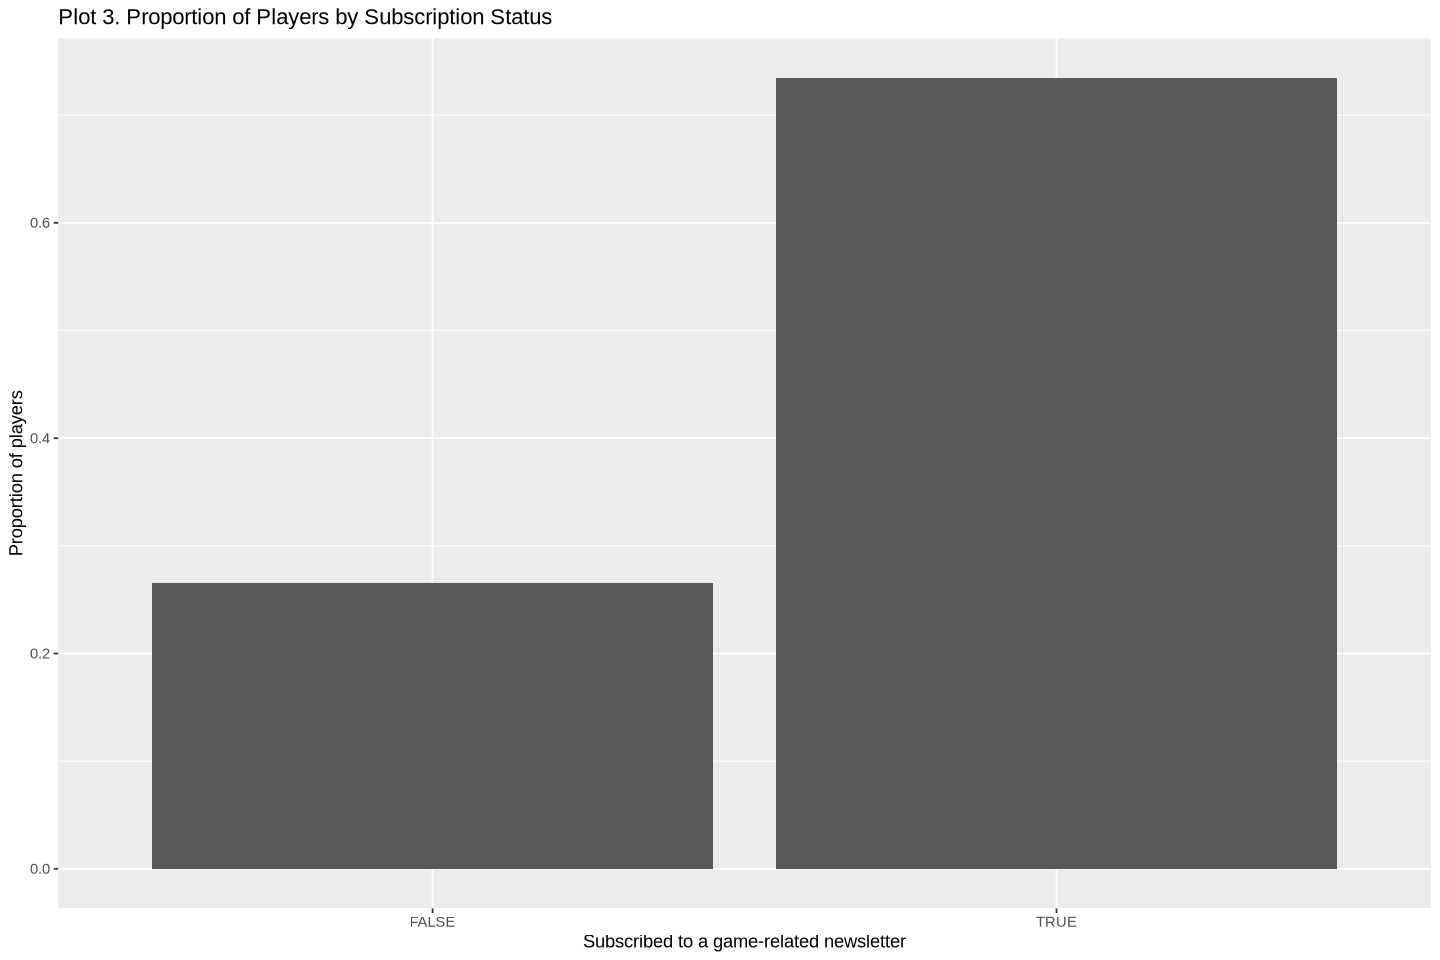

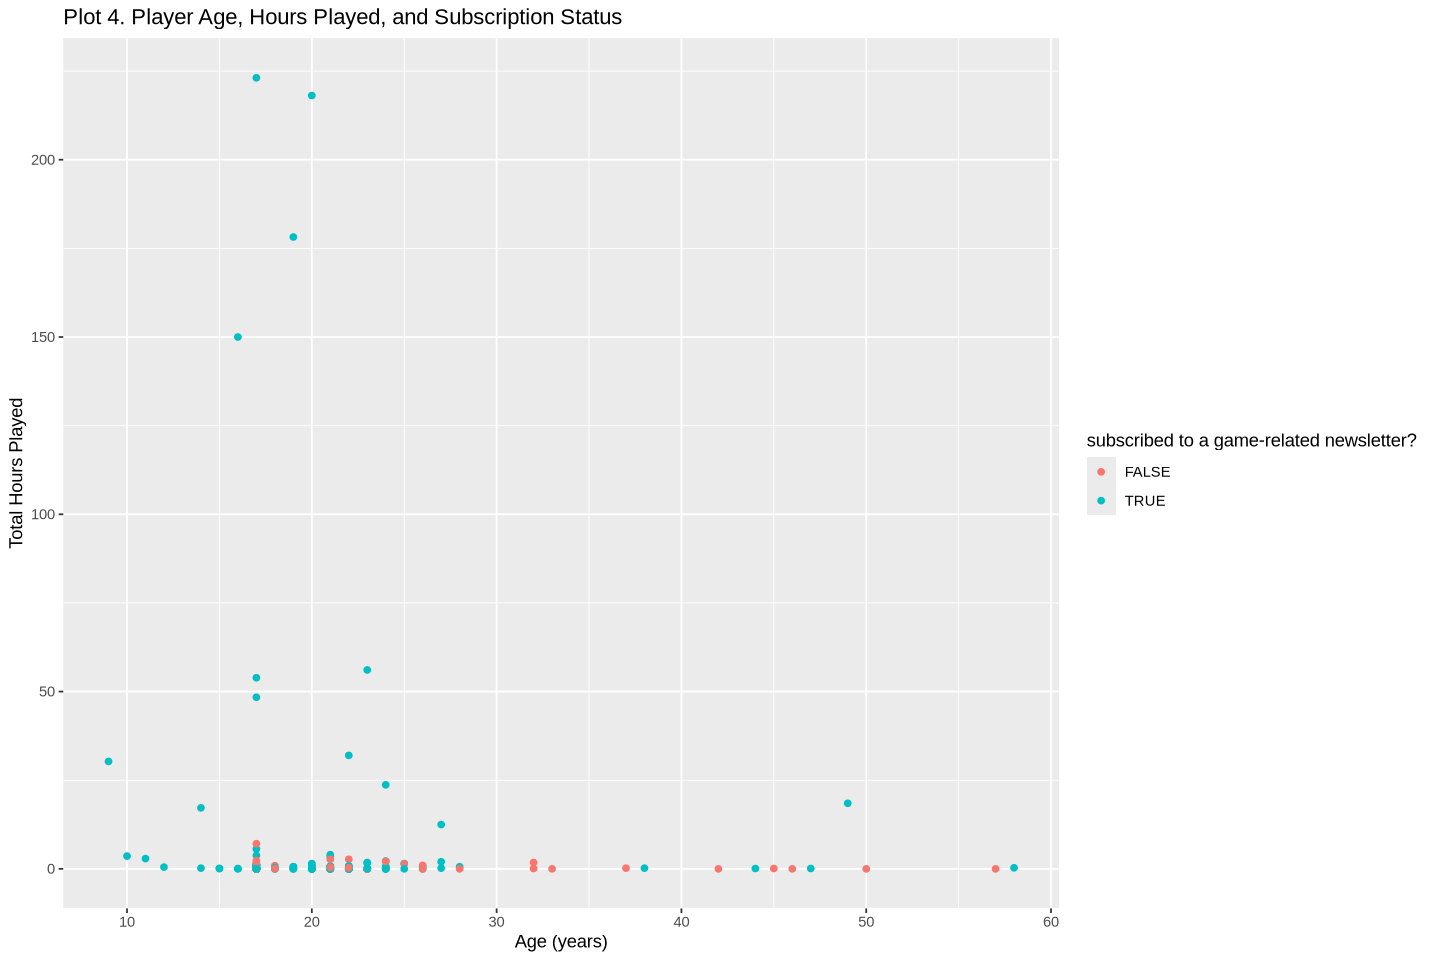

In [141]:
hours_plot <- players |>
    ggplot(aes(x = played_hours)) +
    geom_histogram(binwidth = 10, boundary = 0) +
    labs(title = "Plot 1. Distribution of Total Hours Played by Participants", x = "Total hours played")

age_plot <- players |>
    ggplot(aes(x = Age)) +
    geom_histogram(binwidth = 5, boundary = 0) +
    labs(title = "Plot 2. Distribution of Age of Participants", x = "Age (years)")

subscribe_plot <- players |>
    ggplot(aes(x = subscribe)) +
    geom_bar(aes(y = after_stat(count / sum(count)))) +
    labs(title = "Plot 3. Proportion of Players by Subscription Status", x = "Subscribed to a game-related newsletter", y = "Proportion of players")


players_plot <- players |>
    ggplot(aes(x = Age, y = played_hours, color = subscribe)) +
    geom_point() +
    labs(title = "Plot 4. Player Age, Hours Played, and Subscription Status", x = "Age (years)", y = "Total Hours Played", color = "subscribed to a game-related newsletter?")

hours_plot
age_plot
subscribe_plot
players_plot

# Analysis of Plots
## Plot 1
- centered around 0 - 10 hours
- large right skew
- shows that most participants have 0-10 hours played, with very few playing more than 10 hours

## Plot 2
- centered around 15-25 years old
- skewed right
- shows that most participants are young, but there are a few much older participants that stretch the distribution to the right

## Plot 3
- around 75% of participants are subscribed to a game-related newletter
- around 25% of participants are not subscribed to a game-related newletter

## Plot 4
- Most data points are right on the x-axis signifying very little total hours played
- clustered data points around 15-25 years old
- majority of data points are coloured blue, meaning most participants are subscribed to a game-related newsletter
- all data points over 25 total hours played are subscribed
- all data points under 15 years old are subscribed
- past 40 years old, the majority of data points are not subscribed
- mixed subscription status between the ages of 15-30 year old
- does not show an obvious pattern of subscription status

## Potential Problems
- Compared to the number of participants that have played under 10 hours, we do not have many data points which show participants that have played for more than 10 hours. The model may be better trained to classify data points that have played under 10 hours
- Compared to the number of participants between the ages of 15-25 years old, we do not have many data points from participants that are older than the age of 25. The model may be better trained to classify data points where the participants age is between 15-25 years old.
- Porportion of players subscribed and not subscribed is not equal, meaning the model may be biased towards the majority subscribed class